In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
import matplotlib as mpl

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
colormap = plt.get_cmap('cool')

In [3]:
%matplotlib notebook

# Жаботинского-Корзухина

In [4]:
def runge_kutta3(function, iterations, initial, step, parameters):
    x_val = [initial[0]]
    y_val = [initial[1]]
    z_val = [initial[2]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1, z1 = function(x_val[-1], y_val[-1], z_val[-1], parameters)
        x2, y2, z2 = function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, z_val[-1]+step*z1/2, parameters)
        x3, y3, z3 = function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, z_val[-1]+step*z2/2, parameters)
        x4, y4, z4 = function(x_val[-1]+step*x3, y_val[-1]+step*y3, z_val[-1]+step*z3, parameters)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        z_val.append(z_val[-1]+step*(z1+2*z2+2*z3+z4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x_val, y_val, z_val

In [5]:
def zhab_kor(x, y, z, parameters):
    c, k0, k1, k2, k3 = parameters
    return (k1*x*(c - y) - k0*x*z,
            k1*x*(c - y) - k2*y,
            k2*y - k3*z)

In [6]:
iterations_zhk = 50
initial_zhk = (1, 1, 1)
step_zhk = 0.01
parameters_zhk = (3, 0.5, 0.5, 0.5, 0.5)
t_val_zhk, x_val_zhk, y_val_zhk, z_val_zhk = runge_kutta3(zhab_kor, iterations_zhk, initial_zhk, step_zhk, parameters_zhk)

<IPython.core.display.Javascript object>


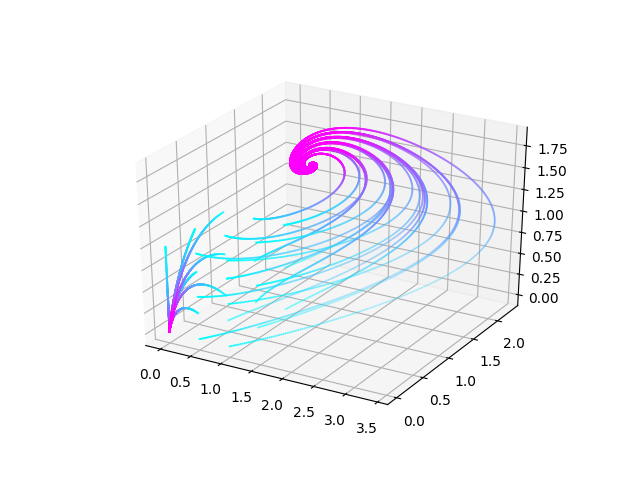

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_ = np.linspace(0., 1., 3)
y_ = np.linspace(0., 1., 3)
z_ = np.linspace(0., 1., 3)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')
x, y, z = x.flatten(), y.flatten(), z.flatten()
initials = list(zip(x,y,z))
for i in initials:
    norm = mpl.colors.Normalize(0.0, t_val_zhk[-1]/10)
    t_val_zhk, x_val_zhk, y_val_zhk, z_val_zhk = runge_kutta3(zhab_kor, iterations_zhk, i, step_zhk, parameters_zhk)
    ax.scatter(x_val_zhk, y_val_zhk, z_val_zhk, c=t_val_zhk, s=2, cmap=colormap, norm=norm, linewidths=0)

<IPython.core.display.Javascript object>


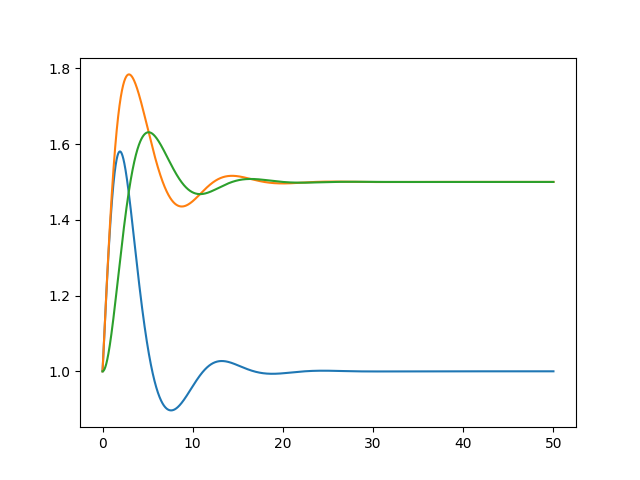

In [8]:
plt.plot(t_val_zhk, x_val_zhk)
plt.plot(t_val_zhk, y_val_zhk)
plt.plot(t_val_zhk, z_val_zhk)

<IPython.core.display.Javascript object>


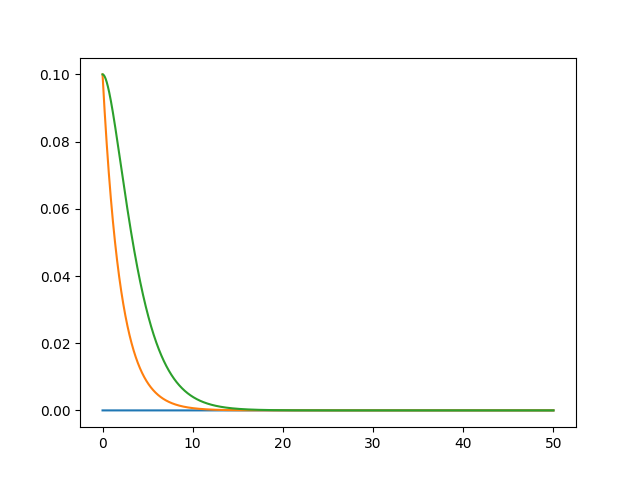

In [9]:
iterations_zhk = 50
initial_zhk = (0, 0.1, 0.1)
step_zhk = 0.01
parameters_zhk = (3, 0.5, 0.5, 0.5, 0.5)
t_val_zhk, x_val_zhk, y_val_zhk, z_val_zhk = runge_kutta3(zhab_kor, iterations_zhk, initial_zhk, step_zhk, parameters_zhk)
plt.plot(t_val_zhk, x_val_zhk)
plt.plot(t_val_zhk, y_val_zhk)
plt.plot(t_val_zhk, z_val_zhk)

In [10]:
def runge_kutta2(function, iterations, initial, step, parameters):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1 = function(x_val[-1], y_val[-1], parameters)
        x2, y2 = function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, parameters)
        x3, y3 = function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, parameters)
        x4, y4 = function(x_val[-1]+step*x3, y_val[-1]+step*y3, parameters)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x_val, y_val

In [11]:
def brusselator(x, y, parameters):
    a, b = parameters
    return (a + x*x*y - b*x - x, b*x - x*x*y)

In [12]:
iterations_br = 50
initial_br = (1, 1)
step_br = 0.01
parameters_br = (1, 3)
t_val_br, x_val_br, y_val_br = runge_kutta2(brusselator, iterations_br, initial_br, step_br, parameters_br)

<IPython.core.display.Javascript object>


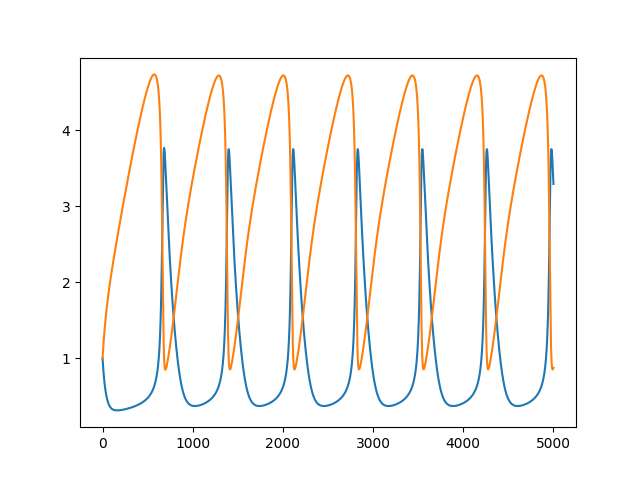

In [13]:
plt.plot(x_val_br)
plt.plot(y_val_br)

<IPython.core.display.Javascript object>


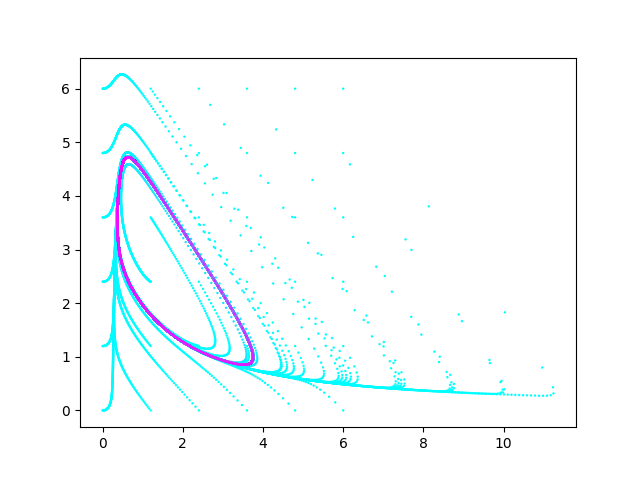

In [14]:
x_ = np.linspace(0., 6., 6)
y_ = np.linspace(0., 6., 6)

x, y = np.meshgrid(x_, y_, indexing='ij')
x, y = x.flatten(), y.flatten()
ax = plt.subplot(1, 1, 1)
initials = list(zip(x,y))
for i in initials:
    t_val_br, x_val_br, y_val_br = runge_kutta2(brusselator, iterations_br, i, step_br, parameters_br)
    norm = mpl.colors.Normalize(0.0, t_val_br[-1])
    ax.scatter(x_val_br, y_val_br, c=t_val_br, s=3, cmap=colormap, norm=norm, linewidths=0)

In [15]:
iterations_br_stable = 50
initial_br_stable = (1, 1)
step_br_stable = 0.01
parameters_br_stable = (1, 1.7)
t_val_br_stable, x_val_br_stable, y_val_br_stable = runge_kutta2(brusselator, iterations_br_stable, initial_br_stable, step_br_stable, parameters_br_stable)

<IPython.core.display.Javascript object>


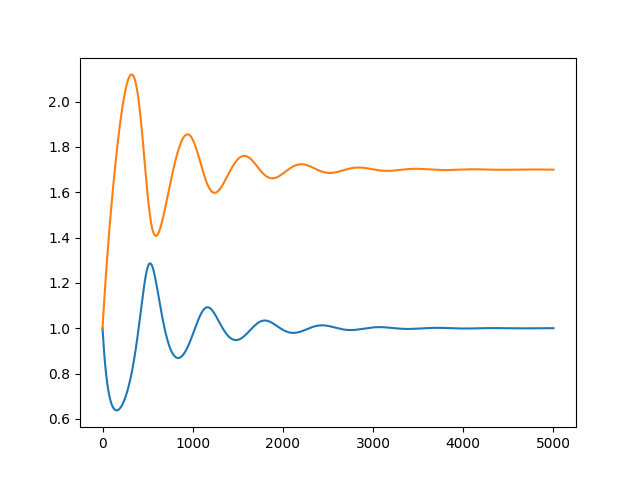

In [16]:
plt.plot(x_val_br_stable)
plt.plot(y_val_br_stable)

<IPython.core.display.Javascript object>


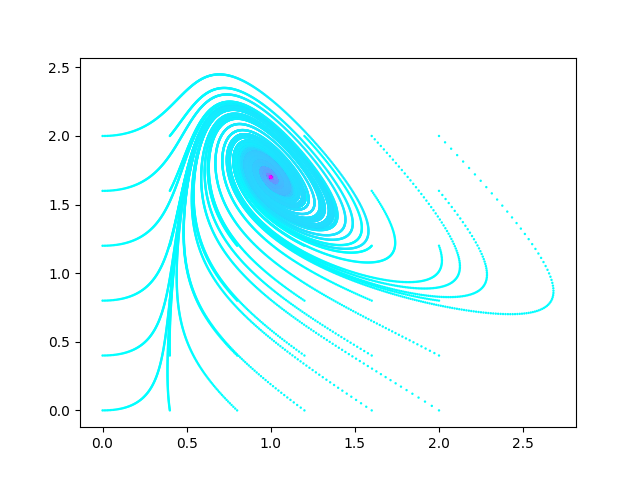

In [17]:
x_ = np.linspace(0., 2., 6)
y_ = np.linspace(0., 2., 6)

x, y = np.meshgrid(x_, y_, indexing='ij')
x, y = x.flatten(), y.flatten()
ax = plt.subplot(1, 1, 1)
initials = list(zip(x,y))
for i in initials:
    t_val_br_stable, x_val_br_stable, y_val_br_stable = runge_kutta2(brusselator, iterations_br_stable, i, step_br_stable, parameters_br_stable)
    norm = mpl.colors.Normalize(0.0, t_val_br[-1])
    ax.scatter(x_val_br_stable, y_val_br_stable, c=t_val_br_stable, s=3, cmap=colormap, norm=norm, linewidths=0)

In [18]:
def oregonator(values, t, a, b, k1, k2, k3, k4, k5, f):
    x, y, z = values
    return [k1*a*y - k2*x*y + k3*b*x - k4*x*x,
           -k1*a*y - k2*x*y + f*k5*z,
            k3*b*x - k5*z]

In [27]:
t_val_or = np.linspace(0, 200, 10000)
sol_or = odeint(oregonator, (0.0001, 0.0001, 0.0001), t_val_or, args=(0.06, 0.02, 1.28, 2.4*1000000, 2*33.6, 2*2400, 1/2, 1))
x_val_or, y_val_or, z_val_or = np.log10(sol_or[:, 0]), np.log10(sol_or[:, 1]), np.log10(sol_or[:, 2])

<IPython.core.display.Javascript object>


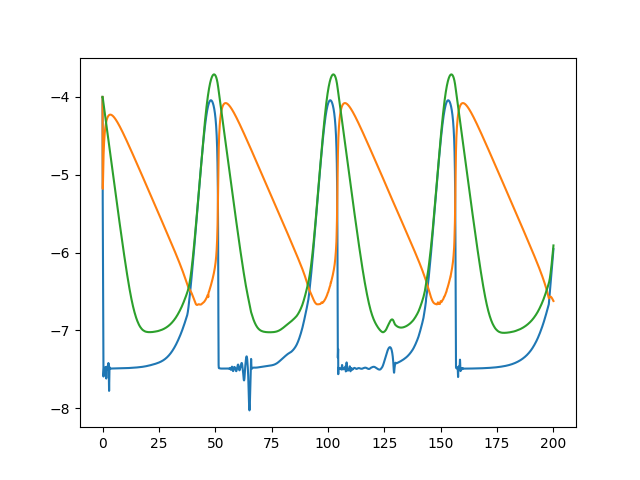

In [28]:
plt.plot(t_val_or, x_val_or)
plt.plot(t_val_or, y_val_or)
plt.plot(t_val_or, z_val_or)

<IPython.core.display.Javascript object>


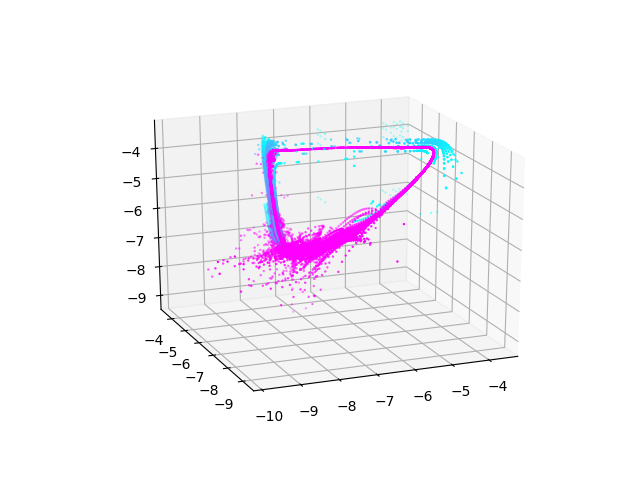

/Users/cmlimm/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/cmlimm/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_ = np.linspace(0.000001, 0.0002, 4)
y_ = np.linspace(0.000001, 0.0002, 4)
z_ = np.linspace(0.000001, 0.0002, 4)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')
x, y, z = x.flatten(), y.flatten(), z.flatten()
initials = list(zip(x,y,z))

t_val_or = np.linspace(0, 200, 1000)
for i in initials:
    norm = mpl.colors.Normalize(0.0, t_val_or[-1]/10)
    sol_or = odeint(oregonator, i, t_val_or, args=(0.06, 0.02, 1.28, 2.4*1000000, 2*33.6, 2*2400, 1/2, 1))
    x_val_or, y_val_or, z_val_or = np.log10(sol_or[:, 0]), np.log10(sol_or[:, 1]), np.log10(sol_or[:, 2])
    ax.scatter(x_val_or, y_val_or, z_val_or, c=t_val_or, s=3, cmap=colormap, norm=norm, linewidths=0)

<IPython.core.display.Javascript object>


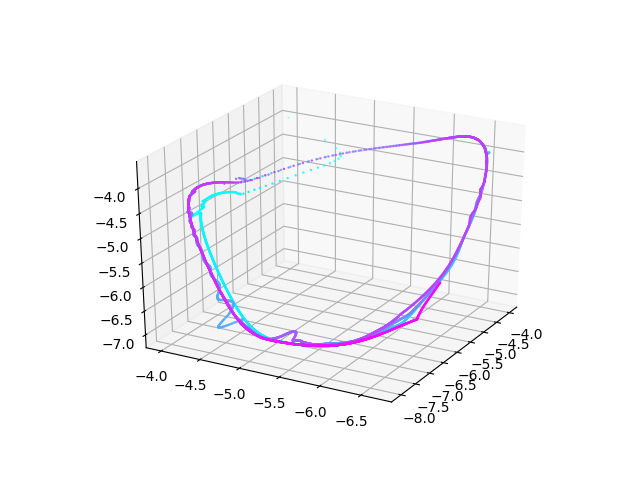

In [29]:
norm = mpl.colors.Normalize(0.0, 200)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_val_or, y_val_or, z_val_or, c=t_val_or, s=3, cmap=colormap, norm=norm, linewidths=0)

In [30]:
def test(values, t, alpha, beta, gamma):
    a, b, c = values
    return (a*(alpha*b - gamma*c), 
            b*(beta*c - alpha*a), 
            c*(gamma*a - beta*b))

In [31]:
t = np.linspace(0, 10, 1000)
sol = odeint(test, (1, 1, 1), t, args=(1.2, 1, 1))
a, b, c = sol[:, 0], sol[:, 1], sol[:, 2]

<IPython.core.display.Javascript object>


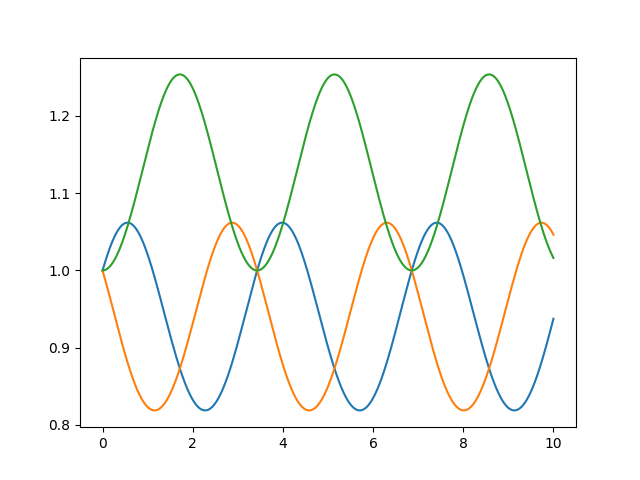

In [32]:
plt.plot(t, a)
plt.plot(t, b)
plt.plot(t, c)

<IPython.core.display.Javascript object>


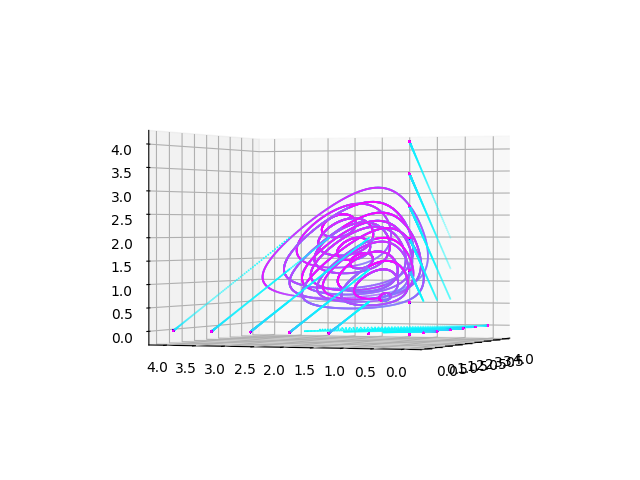

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_ = np.linspace(0., 2., 4)
y_ = np.linspace(0., 2., 4)
z_ = np.linspace(0., 2., 4)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')
x, y, z = x.flatten(), y.flatten(), z.flatten()
initials = list(zip(x,y,z))
t = np.linspace(0, 10, 1000)
for i in initials:
    norm = mpl.colors.Normalize(0.0, 10)
    sol = odeint(test, i, t, args=(1.2, 1, 1))
    a, b, d = sol[:, 0], sol[:, 1], sol[:, 2]
    ax.scatter(a, b, d, c=t, s=2, cmap=colormap, norm=norm, linewidths=0)